# Guided Projects Artificial Intelligence & Machine Learning
## Guided Projects: Unsupervised Learning
### Association Rule Mining: Market Basket Analysis
Association Rule Mining is used when we want to find an association between different 
objects in a set or find frequent patterns in a transaction database or relational databases. 
The applications of Association Rule Mining are found in Marketing, Basket Data Analysis
(or Market Basket Analysis) in retailing, clustering and classification. It can be used to find 
what items do customers frequently buy together by generating a set of rules called 
Association Rules.
### Question:
Apriori is a statistical algorithm for implementing associate rule mining, that primarily relies on 
three components: Life, Support and Confidence. Using this algorithm try to find the rules that 
describe the relation between each of the products that were brought by the customers as 
described in

Dataset Link: Store Data
https://drive.google.com/file/d/1y5DYn0dGoSbC22xowBq2d4po6h1JxcTQ/view?usp=sharing

In [2]:
! pip install mlxtend

In [9]:
# Import suitable libraries
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('store_data.csv', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
items = set()
for col in data:
    items.update(data[col].unique())
print(items)

{'parmesan cheese', 'mashed potato', nan, 'whole weat flour', 'grated cheese', 'green tea', 'whole wheat rice', 'nonfat milk', 'tomato sauce', 'ketchup', 'rice', 'fresh bread', 'turkey', 'barbecue sauce', 'antioxydant juice', 'cooking oil', 'flax seed', 'spinach', 'shallot', 'oil', 'mayonnaise', 'salt', 'brownies', 'chocolate', 'butter', 'carrots', 'mushroom cream sauce', 'cookies', 'herb & pepper', 'tomatoes', 'eggplant', 'french wine', 'hand protein bar', 'chocolate bread', 'eggs', 'toothpaste', 'spaghetti', 'mint green tea', 'chutney', 'fresh tuna', 'bug spray', 'mint', 'white wine', 'water spray', 'ham', 'clothes accessories', 'soup', 'honey', 'yogurt cake', 'shrimp', 'sparkling water', 'melons', 'gluten free bar', 'sandwich', 'light cream', 'cream', 'blueberries', 'frozen smoothie', 'vegetables mix', 'shampoo', 'napkins', 'extra dark chocolate', 'low fat yogurt', 'salad', 'cake', ' asparagus', 'pancakes', 'magazines', 'protein bar', 'almonds', 'milk', 'french fries', 'pepper', 'ba

In [11]:
itemset = set(items)
encoded_vals = []
for index, row in data.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

In [26]:
ohe_df = ohe_df.drop(ohe_df.columns[[2]], axis = 1)
ohe_df.head()

,parmesan cheese,mashed potato,milk,grated cheese,whole wheat rice,nonfat milk,tomato sauce,ketchup,french fries,rice,...,frozen smoothie,vegetables mix,yams,low fat yogurt,salad,olive oil,cottage cheese,salmon,mineral water,almonds
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
freq_items = apriori(ohe_df, min_support=0.02, use_colnames=True, verbose=1)
freq_items.head(7)

Processing 897 combinations | Sampling itemset size 32


,support,itemsets
0,0.129583,(milk)
1,0.052393,(grated cheese)
2,0.058526,(whole wheat rice)
3,0.170911,(french fries)
4,0.026530,(pepper)
5,0.043061,(fresh bread)
6,0.062525,(turkey)


In [49]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.01)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(french fries),(milk),0.170911,0.129583,0.023730,0.138846,1.071482,0.001583,1.010756
1,(milk),(french fries),0.129583,0.170911,0.023730,0.183128,1.071482,0.001583,1.014956
2,(milk),(frozen vegetables),0.129583,0.095321,0.023597,0.182099,1.910382,0.011245,1.106099
3,(frozen vegetables),(milk),0.095321,0.129583,0.023597,0.247552,1.910382,0.011245,1.156781
4,(milk),(chocolate),0.129583,0.163845,0.032129,0.247942,1.513276,0.010898,1.111823


### Visualising the results

#### 1. Support vs Confidence

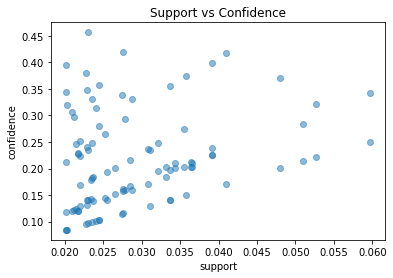

In [50]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

#### 2. Support vs Lift

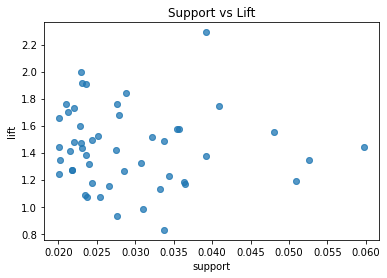

In [51]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

#### 3. Lift vs Confidence

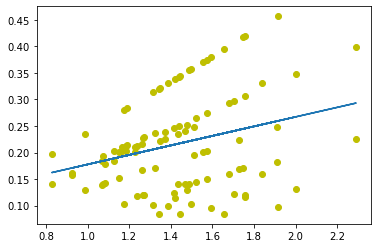

In [52]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],fit_fn(rules['lift']))